In [60]:
import numpy as np
X = np.genfromtxt('X.dat', delimiter=",")
beta1 = np.array([0.1, 0.3, 0.2, 0.2, 0.9, 0.8, 0.9, 0.1, 0.4, 0.2, 0.7, 0.3, 0.1, 0.7, 0.8, 0.3, 0.2, 0.8, 0.1, 0.7])
beta2 = np.array([0.5, 0.6, 0.7, 0.9, 0.9, 0.8, 0.9, 0.8, 0.6, 0.5, 0.7, 0.6, 0.7, 0.7, 0.8, 0.8, 0.9, 0.8, 0.5, 0.7])
I = np.identity(20)
print(np.sum(beta1**2))
print(np.sum(beta2**2))

5.640000000000001
10.720000000000002


In [61]:
MSE1 = []
MSE2 = []
lambdas = np.arange(0, 5, 0.05)
for _lambda in lambdas:
    error1 = error2 = 0
    for n in range(0, 100):
        e = np.random.normal(0, 1, 50)
        y1 = np.dot(X, beta1) + e
        y2 = np.dot(X, beta2) + e
        _beta1 = np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(), X) + _lambda*I), X.transpose()), y1)
        _beta2 = np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(), X) + _lambda*I), X.transpose()), y2)
        error1 += np.square(np.linalg.norm(y1 - np.dot(X, _beta1)))
        error2 += np.square(np.linalg.norm(y2 - np.dot(X, _beta2)))
    MSE1.append(error1/100)
    MSE2.append(error2/100)

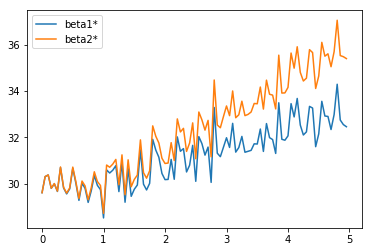

In [64]:
import matplotlib.pyplot as plt
curve1, = plt.plot(lambdas, MSE1, label='beta1*')
curve2, = plt.plot(lambdas, MSE2, label='beta2*')
plt.legend(handles=[curve1, curve2])

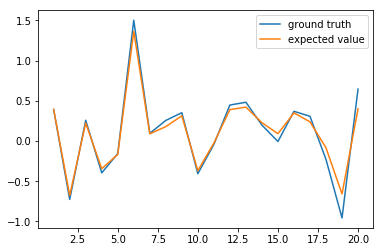

In [55]:
from sklearn.preprocessing import scale
X = X / X.max(axis=0)
Up, l, VT = np.linalg.svd(X, full_matrices=False)
L = np.diag(l)
V = VT.transpose()
_lambda = 1
alpha = 0.1
beta1 = np.array([0.1, 0.3, 0.2, 0.2, 0.9, 0.8, 0.9, 0.1, 0.4, 0.2, 0.7, 0.3, 0.1, 0.7, 0.8, 0.3, 0.2, 0.8, 0.1, 0.7])
gamma = np.dot(VT, beta1)
E_gamma1 = np.zeros(20)
mean_square_error = 0
for n in range (0, 100):
    e = np.random.normal(0, 1, 50)
    y1 = np.ones(50)*alpha + np.dot(X, beta1) + e
    gamma1 = np.linalg.inv(np.square(L)+_lambda*I).dot(L).dot(Up.transpose()).dot(y1)
    E_gamma1 += gamma1
    mean_square_error += np.square(gamma1-gamma)
E_gamma1 /= 100
mean_square_error /= 100
p = list(range(1, 21))
curve1, = plt.plot(p, gamma, label='ground truth')
curve2, = plt.plot(p, E_gamma1, label='expected value')
plt.legend(handles=[curve1, curve2])

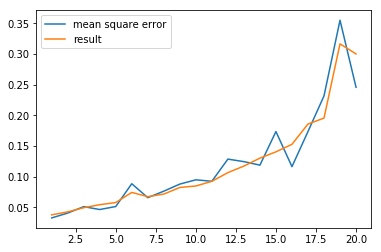

In [56]:
result = []
for i in range(0, 20):
    l_square = np.square(L[i, i])
    result.append((l_square+np.square(gamma[i]))/np.square(l_square+_lambda))
p = list(range(1, 21))
curve1, = plt.plot(p, mean_square_error, label='mean square error')
curve2, = plt.plot(p, result, label='result')
plt.legend(handles=[curve1, curve2])